## Libraries

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

## Reading the Image

In [4]:
img = cv2.imread("./images/q1.png", 0)

## Finding Threshold

In [5]:
_, thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

## Finding Connected Components

In [7]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded, connectivity=4)

## Show the result
### Show each component with a random color, and write the numebr of components on the result image

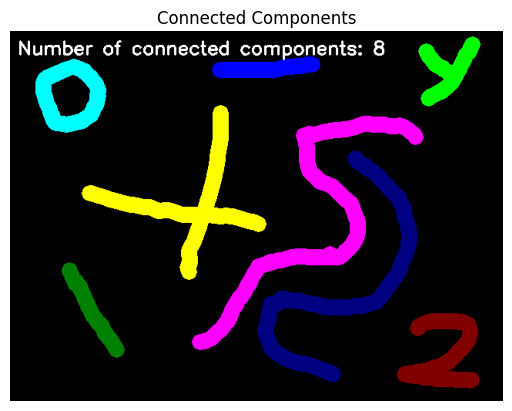

Total number of connected components: 8


In [13]:
# Create a random color map for labeling
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (0, 255, 255),
          (255, 0, 255), (128, 0, 0), (0, 128, 0), (0, 0, 128), (128, 128, 0),
          (0, 128, 128), (128, 0, 128), (255, 128, 0),(255, 0, 128), (128, 255, 0), 
          (0, 255, 128), (128, 0, 255),(0, 128, 255)]

# output image with the shape as same as the input imagee
output = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# create mask for each component
for label in range(1, num_labels):
    mask = np.zeros_like(img, dtype=np.uint8)
    mask[labels == label] = 255  # create a binary mask for the current label
    output[mask == 255] = colors[label % len(colors)]  # assign color to the current label


# the text in which the number of components is mentioned
num_components_str = "Number of connected components: " + str(num_labels - 1)

# put the text on the image
cv2.putText(output, num_components_str, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# convert the output image from BGR to RGB
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# display the result
plt.imshow(output_rgb)
plt.title("Connected Components")
plt.axis('off')
plt.show()

# print the total number of components
print("Total number of connected components:", num_labels - 1)